# Simulate the Monty Hall Problem
- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

Food for thought: And what if you had N doors to choose from and the presenter opens p<=N of them? Study how the probability of winning changes as a function of p and n 
.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
N = 50000 # Number of simulations
conservative=0
switcher=0
newcomer=0
for i in range(N):
    doors=np.array([0,0,0]) #three doors,1 car,2 goats
    choice=np.array([0,0,0]) #vector of choices
    pos=random.randint(0,2) # Position of the prize
    doors[pos]=1
    c=random.randint(0,2) # The door initially chosen by the player 
    choice[c]=1

    a=random.randint(0,2) #Randomic generation of the position of the door to be opened
    while a==pos or a==c : #The position can't be the position of the prize or the chosen position
        a=random.randint(0,2)
    door_opened=a
    doors[a]=-1
    choice[a]=-1 

    conservative+=doors[c] #The conservative keeps his choice 

    b=random.randint(0,2)
    while doors[b]==-1:
        b=random.randint(0,2)
    newcomer+=doors[b] #The newcomer chooses one of the two remaining doors, not the open one


    for j in range(3):
        if choice[j]==0:
            switcher+=doors[j] #The swticher changes the door, not the open one nor the one chosen at the beginning



print("Probability of winning for the conservative", conservative/N)
print("Probability of winning for the swticher", switcher/N)
print("Probability of winning for the newcomer", newcomer/N)



Probability of winning for the conservative 0.33166
Probability of winning for the swticher 0.66834
Probability of winning for the newcomer 0.49646


Number of doors 3
Number of doors opened 1
Probability of winning for the conservative 0.33312
Probability of winning for the newcomer 0.4976
Probability of winning for the swticher 0.66688


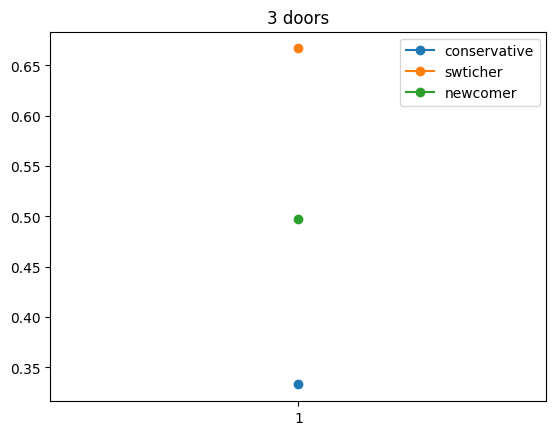

Number of doors 4
Number of doors opened 1
Probability of winning for the conservative 0.25029
Probability of winning for the newcomer 0.3354
Probability of winning for the swticher 0.37367
Number of doors opened 2
Probability of winning for the conservative 0.24942
Probability of winning for the newcomer 0.49966
Probability of winning for the swticher 0.75058


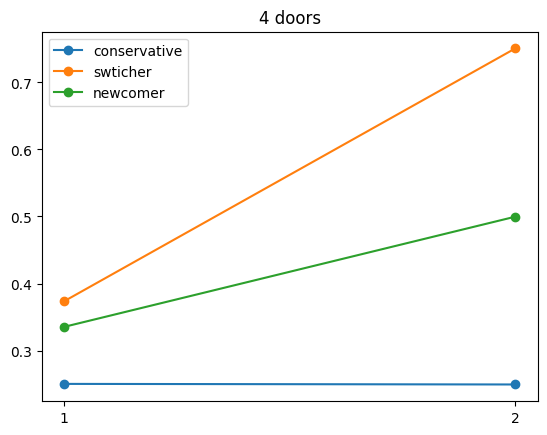

Number of doors 5
Number of doors opened 1
Probability of winning for the conservative 0.19954
Probability of winning for the newcomer 0.24798
Probability of winning for the swticher 0.2708
Number of doors opened 2
Probability of winning for the conservative 0.20131
Probability of winning for the newcomer 0.33257
Probability of winning for the swticher 0.39918
Number of doors opened 3
Probability of winning for the conservative 0.19946
Probability of winning for the newcomer 0.49974
Probability of winning for the swticher 0.80054


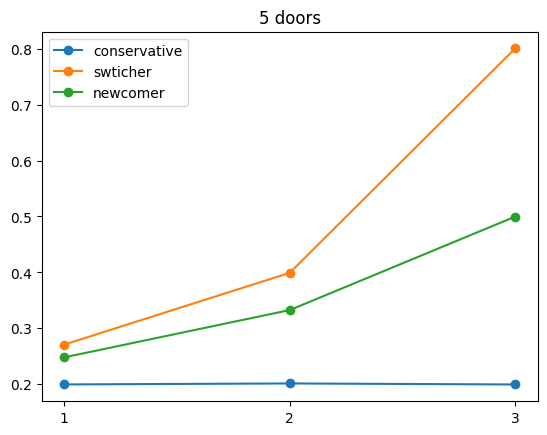

In [6]:
n=100000 # Number of simulations
N=6 #Number of doors

# Loop over different door counts (N)
for num in range (3,N): 
    conservative=[]
    swticher=[]
    newcomer=[]
    M_value=[]

    # Loop over different M (number of doors opened by the host)
    for M in range (1,num-1): 
        cons=0
        new=0
        swt=0

        # Simulate n times
        for i in range (n):
            doors=np.zeros(num) # 0 = goat, 1 = car
            pos=random.randint(0,num-1) # Position of the prize
            doors[pos]=1
            choice=np.zeros(num) # Player's initial choice
            c=random.randint(0,num-1) # The door initially chosen by the player 
            choice[c]=1

            # Host opens M doors
            for j in range (M):
                a=random.randint(0,num-1)
                while choice[a]!=0 or doors[a]!=0:  #The host can't open the player's door or the door with the prize
                    a=random.randint(0,num-1)
                doors[a]=-1
                choice[a]=-1
            

            cons+= doors[c] #The conservative keeps his choice 


            b=random.randint(0,num-1)
            #The newcomer chooses one of the remaining doors, not the open ones
            while doors[b]==-1:   
                b=random.randint(0,num-1)
            new+= doors[b]   
            
             
            remaining_doors=[]
            for h in range (num):
                if choice[h]==0:  # The switcher chooses a random door from those that haven't been opened or chosen
                    remaining_doors.append(h) 
            swt += doors[random.choice(remaining_doors)] # Choose a random door from remaining options

        # Store the probabilities of winning for each strategy
        conservative.append(cons/n)
        swticher.append(swt/n)
        newcomer.append(new/n)
        M_value.append(M)


    print("Number of doors", num)
    for i in range(0,num-2):
        print("Number of doors opened", M_value[i])
        print("Probability of winning for the conservative",conservative[i])
        print("Probability of winning for the newcomer",newcomer[i])
        print("Probability of winning for the swticher",swticher[i])
    
    plt.plot(M_value, conservative, "-o", label="conservative")
    plt.plot(M_value, swticher, "-o", label="swticher")
    plt.plot(M_value, newcomer, "-o", label="newcomer")
    plt.xticks(np.arange(min(M_value), max(M_value) + 1, 1))
    plt.title("%i doors" %num)
    plt.legend()
    plt.show()
    #plt.savefig(f"MontyhallGEN_{num}.png")
    plt.close() 